# Preprocessing
Document -> vector representation

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, re

import textract
import nltk
nltk.download("punkt", download_dir="nltk/")
nltk.data.path.append("nltk/")
from nltk.corpus import stopwords

%matplotlib inline

[nltk_data] Downloading package punkt to nltk/...
[nltk_data]   Package punkt is already up-to-date!


In [83]:
folder_path = "data/"
titles = []
corpus = []

for topic in os.listdir(folder_path):
    topic_path = os.path.join(folder_path, topic)
    for doc in os.listdir(topic_path):
        doc_path = os.path.join(topic_path, doc)
        try:
            doc_text = textract.process(doc_path, method="pdftotext")
            doc_text = doc_text.replace("\n", " ")
            doc_text = re.sub(r"\b[0-9][0-9.,-]*\b", "UNIFIED-NUMBER-TOKEN", doc_text) # TBD, replace numbers 
            corpus.append(doc_text)
            titles.append(doc_path)
        except UnicodeDecodeError as e:
            print("Unable to read-in", doc_path, "(Decoding error)")
            print(e)

('Unable to read-in', 'data/ai/1804.09856.pdf', '(Decoding error)')
'charmap' codec can't decode byte 0x9d in position 1708: character maps to <undefined>
('Unable to read-in', 'data/ai/1804.09817.pdf', '(Decoding error)')
'charmap' codec can't decode byte 0x81 in position 10275: character maps to <undefined>
('Unable to read-in', 'data/economy/1804.05974.pdf', '(Decoding error)')
'charmap' codec can't decode byte 0x81 in position 24474: character maps to <undefined>


In [82]:
len(corpus)

6

## Vectorization

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = []
    for item in tokens:
        stems.append(PorterStemmer().stem(item))
    return stems

tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words="english", strip_accents="unicode")
feature_matrix = tfidf.fit_transform(corpus)

In [77]:
print("Tokens:", len(tfidf.vocabulary_))
tfidf.vocabulary_

('Tokens:', 4547)


{u'quebec': 3116,
 u'yellow': 4384,
 u'secondli': 3443,
 u'dot-com': 1185,
 u'asian': 333,
 u'payoff': 2850,
 u'accur': 137,
 u'martonosi': 2401,
 u'swap': 3799,
 u'digit': 1115,
 u'metapath': 2465,
 u'dell': 1045,
 u'vase': 4181,
 u'govern': 1654,
 u'affect': 176,
 u'cs.ci': 959,
 u'popolazion': 2958,
 u'vector': 4183,
 u'elgar': 1274,
 u'cs.cv': 960,
 u'bevan': 488,
 u'corpora': 901,
 u'graph-bas': 1667,
 u'esop': 1353,
 u'unified-number-token4p1': 4075,
 u'10m': 58,
 u'miller': 2492,
 u'second': 3441,
 u'aggreg': 187,
 u'mean-valu': 2425,
 u'dialogu': 1101,
 u'e+': 1223,
 u'neg': 2605,
 u'asid': 334,
 u'cheng': 684,
 u'plodder': 2935,
 u'new': 2618,
 u'net': 2611,
 u'hectar': 1743,
 u'med': 2430,
 u'elimin': 1275,
 u'intellectu': 1975,
 u'abov': 117,
 u'men': 2450,
 u'mei': 2441,
 u'restat': 3276,
 u'met': 2464,
 u'interpret': 1989,
 u'militari': 2491,
 u'k': 2102,
 u'saless': 3384,
 u'jame': 2051,
 u'loop': 2304,
 u'\xab': 4449,
 u'controversi': 879,
 u'|a|': 4424,
 u'`1q': 98,
 u'

In [78]:
feature_matrix.toarray()

array([[0.00197371, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00588966, 0.00588966,
        0.00588966],
       [0.        , 0.        , 0.00783338, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00555184, 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Similarity

In [79]:
from sklearn.metrics.pairwise import cosine_similarity

cos_similarities = cosine_similarity(feature_matrix)

In [102]:
cos_similarities

array([[1.        , 0.844443  , 0.78472056, 0.76160846, 0.77313415,
        0.85455302],
       [0.844443  , 1.        , 0.74976379, 0.71916526, 0.72443725,
        0.79601184],
       [0.78472056, 0.74976379, 1.        , 0.7503907 , 0.71315846,
        0.77719024],
       [0.76160846, 0.71916526, 0.7503907 , 1.        , 0.70118931,
        0.76202284],
       [0.77313415, 0.72443725, 0.71315846, 0.70118931, 1.        ,
        0.79226884],
       [0.85455302, 0.79601184, 0.77719024, 0.76202284, 0.79226884,
        1.        ]])

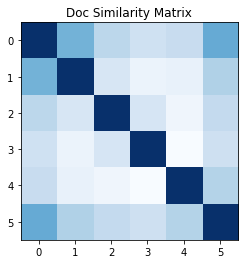

In [100]:
plt.imshow(cos_similarities,cmap="Blues")
plt.title("Doc Similarity Matrix")
plt.show()

# Clustering